# [House Sales in King County](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

This dataset contains house sale prices for King County, which includes Seattle.

It includes homes sold between May 2014 and May 2015.



# Load data

In [ ]:
# !pip install kagglehub --upgrade

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

# print("Path to dataset files:", path)

# df = pd.read_csv(path + "/kc_house_data.csv")
# df.head()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Regression/king_county_house_data_with_address_city_population.csv'
df = pd.read_csv(url)
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  condition  ...  yr_built  yr_renovated  zipcode  \
0     1.0           0     0          3  ...      1955             0    98178   
1     2.0           0     0          3  ...      1951          1991    98125   
2     1.0           0     0          3  ...      1933             0    98028   
3     1.0           0     0          5  ...      1965             0    98136   
4     1.0           0     0          3  ...      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  \
0  47.5112 -122.257           1340        5650   
1  47.7210 -122.319           1690        7639   
2  47.7379 -122.233           2720        8062   
3  47.5208 -122.393           1360        5000   
4  47.6168 -122.045           1800        7503   

                                             address       City  Population  
0  10012, 61st Avenue South, Rainier Beach, Seatt...    Seattle       26122  
1  837, Northeast 127th Street, Northgate, Seattl...    Seattle       42965  
2  15109, 81st Avenue Northeast, Moorlands, Kenmo...    Kenmore       23914  
3  9236, Fauntleroy Way Southwest, Fauntleroy, Se...    Seattle       16424  
4  907, 221st Avenue Northeast, Sammamish, King C...  Sammamish       30534  

[5 rows x 23 columns]

# Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**To do**:
1. Drop id.
2. Convert date into datetime, create Y,M,D
3. Convert zip, lat, long into address.





In [ ]:
# df.drop(columns=['id'], inplace=True)

## Check duplicates

In [ ]:
df.duplicated().sum()

0

## Check missing

In [ ]:
df.isna().sum().sum()

0

## Get address

In [ ]:
# df.to_csv('kc_house_data_with_address.csv', index=False)

In [ ]:
# # import module
# from geopy.geocoders import Nominatim

# def reverse_geocode(latitude, longitude):
#     geolocator = Nominatim(user_agent="geopy_example")
#     location = geolocator.reverse((latitude, longitude))

#     if location:
#         address = location.address
#         return address
#     else:
#         return None

# df['address'] = df.apply(lambda x: reverse_geocode(x['lat'], x['long']), axis=1)

## Webscrape city and population for each zip zode

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd


# url = 'https://www.zip-codes.com/county/wa-king.asp'
# response = requests.get(url)
# response.raise_for_status()  # Check for request errors

# soup = BeautifulSoup(response.text, 'html.parser')
# table = soup.find('table', {'class': 'statTable'})

# data = []
# for row in table.find_all('tr')[1:]:  # Skip the header row
#     cols = row.find_all('td')
#     zip_code = cols[0].text.strip()
#     city = cols[2].text.strip()
#     population_text = cols[3].text.strip().replace(',', '')

#     # Check if population is numeric, otherwise set it to None
#     population = int(population_text) if population_text.isdigit() else None

#     data.append({'ZIP Code': zip_code, 'City': city, 'Population': population})

# df_zipcode = pd.DataFrame(data)

In [ ]:
# Remove string ZIP code
# df_zipcode['ZIP Code'] = df_zipcode['ZIP Code'].str.replace('ZIP Code ','').astype(int)
# df_zipcode.head()

In [ ]:
# Update df with new information
# df_mod = df.copy()

# df_mod = pd.merge(df_mod, df_zipcode, left_on='zipcode', right_on='ZIP Code', how='left')
# df_mod.head()


In [ ]:
# df_mod['ZIP Code'].isna().sum()

In [ ]:
# df_mod.drop(columns=['ZIP Code'], inplace=True)
# df_mod.to_csv('kc_house_data_with_address_city.csv', index=False)

## Basic statistics

In [ ]:
df.describe().T

count           mean            std         min         25%  \
price          21613.0  540088.141767  367127.196483  75000.0000  321950.000   
bedrooms       21613.0       3.370842       0.930062      0.0000       3.000   
bathrooms      21613.0       2.114757       0.770163      0.0000       1.750   
sqft_living    21613.0    2079.899736     918.440897    290.0000    1427.000   
sqft_lot       21613.0   15106.967566   41420.511515    520.0000    5040.000   
floors         21613.0       1.494309       0.539989      1.0000       1.000   
waterfront     21613.0       0.007542       0.086517      0.0000       0.000   
view           21613.0       0.234303       0.766318      0.0000       0.000   
condition      21613.0       3.409430       0.650743      1.0000       3.000   
grade          21613.0       7.656873       1.175459      1.0000       7.000   
sqft_above     21613.0    1788.390691     828.090978    290.0000    1190.000   
sqft_basement  21613.0     291.509045     442.575043      0.0000       0.000   
yr_built       21613.0    1971.005136      29.373411   1900.0000    1951.000   
yr_renovated   21613.0      84.402258     401.679240      0.0000       0.000   
zipcode        21613.0   98077.939805      53.505026  98001.0000   98033.000   
lat            21613.0      47.560053       0.138564     47.1559      47.471   
long           21613.0    -122.213896       0.140828   -122.5190    -122.328   
sqft_living15  21613.0    1986.552492     685.391304    399.0000    1490.000   
sqft_lot15     21613.0   12768.455652   27304.179631    651.0000    5100.000   
Population     21613.0   35848.437006   13557.941268   2915.0000   26022.000   

                       50%         75%           max  
price          450000.0000  645000.000  7.700000e+06  
bedrooms            3.0000       4.000  3.300000e+01  
bathrooms           2.2500       2.500  8.000000e+00  
sqft_living      1910.0000    2550.000  1.354000e+04  
sqft_lot         7618.0000   10688.000  1.651359e+06  
floors              1.5000       2.000  3.500000e+00  
waterfront          0.0000       0.000  1.000000e+00  
view                0.0000       0.000  4.000000e+00  
condition           3.0000       4.000  5.000000e+00  
grade               7.0000       8.000  1.300000e+01  
sqft_above       1560.0000    2210.000  9.410000e+03  
sqft_basement       0.0000     560.000  4.820000e+03  
yr_built         1975.0000    1997.000  2.015000e+03  
yr_renovated        0.0000       0.000  2.015000e+03  
zipcode         98065.0000   98118.000  9.819900e+04  
lat                47.5718      47.678  4.777760e+01  
long             -122.2300    -122.125 -1.213150e+02  
sqft_living15    1840.0000    2360.000  6.210000e+03  
sqft_lot15       7620.0000   10083.000  8.712000e+05  
Population      36073.0000   43630.000  7.717600e+04

## Features relevance

In [ ]:
df.describe(include='object').T

count unique                                                top  freq
date     21613    372                                    20140623T000000   142
address  21613  20271  Sahalee Country Club, 21200, Northeast Sahalee...     9
City     21613     24                                            Seattle  8977

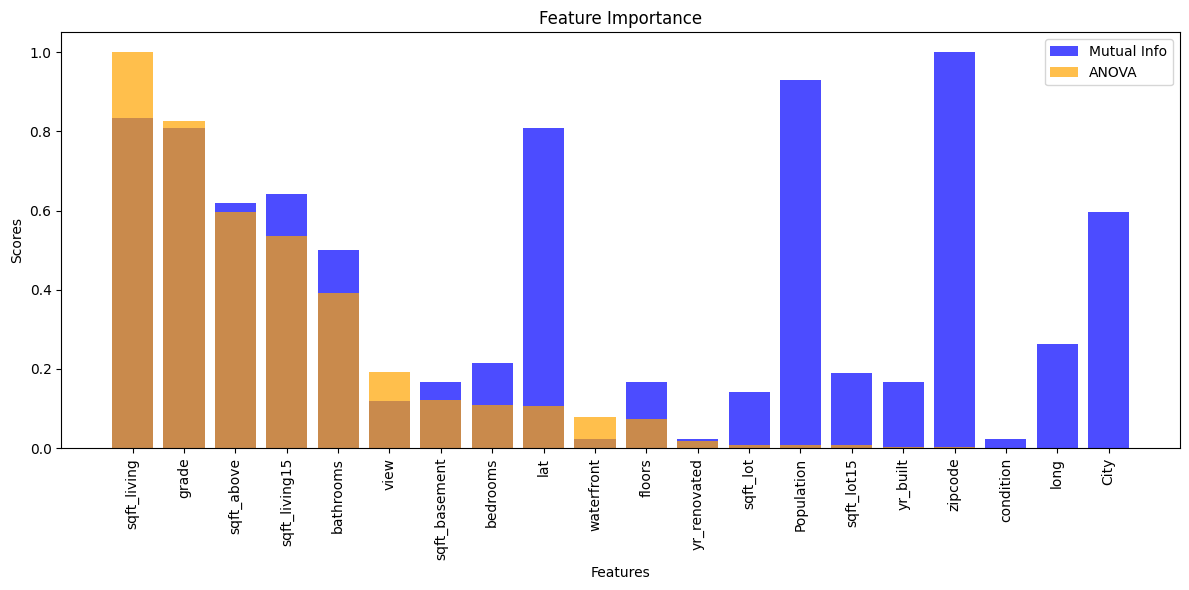

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.preprocessing import OrdinalEncoder

feats_drop = ['date','address']
feats_encode = 'City'

df_temp = df.copy()
df_temp.drop(columns=feats_drop, inplace=True)

oe = OrdinalEncoder()
df_temp[feats_encode] = oe.fit_transform(df_temp[[feats_encode]])

X_temp = df_temp.drop(columns=['price'])
y_temp = df_temp['price']

# Mutual Info Regress
mir = SelectKBest(mutual_info_regression, k=10)
mir_rsults = mir.fit(X_temp, y_temp)

# ANOVA
anova = SelectKBest(f_regression, k=10)
anova_rsults = anova.fit(X_temp, y_temp)

df_results = pd.DataFrame({
    'Feature': X_temp.columns,
    'Mutual Info': np.round(mir_rsults.scores_,2),
    'ANOVA': np.round(anova_rsults.scores_,2),
}).sort_values(by='ANOVA', ascending=False)

# Scale scores for comparison
df_results['Mutual Info'] = df_results['Mutual Info'] / df_results['Mutual Info'].max()
df_results['ANOVA'] = df_results['ANOVA'] / df_results['ANOVA'].max()

plt.figure(figsize=(12, 6))
plt.bar(df_results['Feature'], df_results['Mutual Info'], color='blue', alpha=0.7, label='Mutual Info')
plt.bar(df_results['Feature'], df_results['ANOVA'], color='orange', alpha=0.7, label='ANOVA')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.legend()
plt.tight_layout()

plt.show()

## Observations:
* Primary features:
  * sqft_living, grade, sqft_above, sqft_living15, bathrooms
  * lat, population, zipcode, city

* Secondary features:
  * view, sqft_basement, bedrooms, waterfront, floors,
  * yr_renovated, sqft_lot, sqft_lot15, yr_built, condition

* interior:
  * sqft_living, grade, sqft_above, sqft_living15, bathrooms,
  bedrooms, sqft_basement, floors, sqft_lot, sqft_lot15

* exterior:
  * view, waterfront, condition

* others:
  * lat, long, yr_renovated, population, city




## Comments:

* City is the main branch, each city has various subset/zipcode.

* Population is for zipcode.



# Data Engineering & EDA

## Create new features Month & Day columns

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  zipcode      lat     long  sqft_living15  \
0           0     0          3  ...    98178  47.5112 -122.257           1340   
1           0     0          3  ...    98125  47.7210 -122.319           1690   
2           0     0          3  ...    98028  47.7379 -122.233           2720   
3           0     0          5  ...    98136  47.5208 -122.393           1360   
4           0     0          3  ...    98074  47.6168 -122.045           1800   

   sqft_lot15                                            address       City  \
0        5650  10012, 61st Avenue South, Rainier Beach, Seatt...    Seattle   
1        7639  837, Northeast 127th Street, Northgate, Seattl...    Seattle   
2        8062  15109, 81st Avenue Northeast, Moorlands, Kenmo...    Kenmore   
3        5000  9236, Fauntleroy Way Southwest, Fauntleroy, Se...    Seattle   
4        7503  907, 221st Avenue Northeast, Sammamish, King C...  Sammamish   

   Population  month  day  
0       26122     10   13  
1       42965     12    9  
2       23914      2   25  
3       16424     12    9  
4       30534      2   18  

[5 rows x 25 columns]

## Pairplot

In [ ]:
interiors = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'sqft_basement', \
             'floors', 'sqft_lot', 'sqft_lot15', 'price']

sns.pairplot(df[interiors], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


Output hidden; open in https://colab.research.google.com to view.

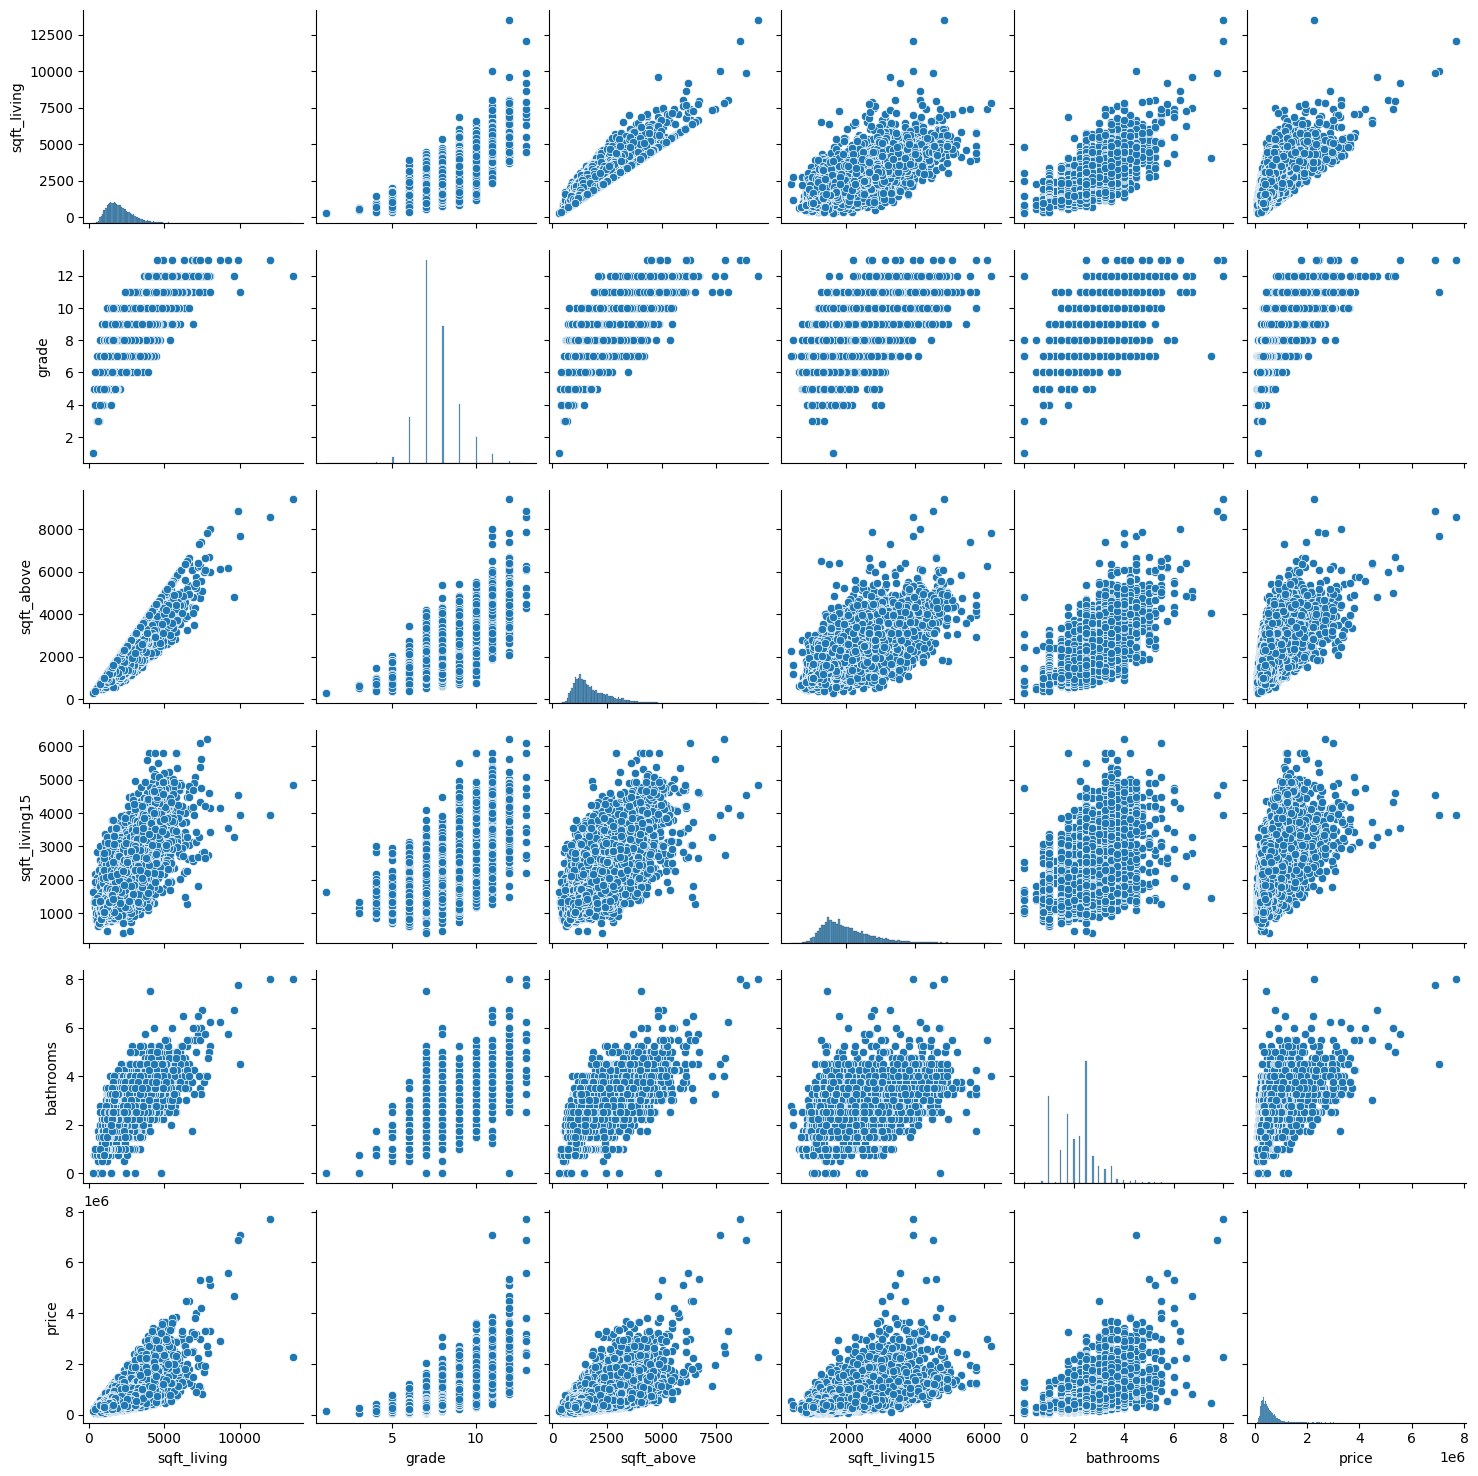

In [ ]:
sns.pairplot(df, vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms','price'])


## Numeric features distribution

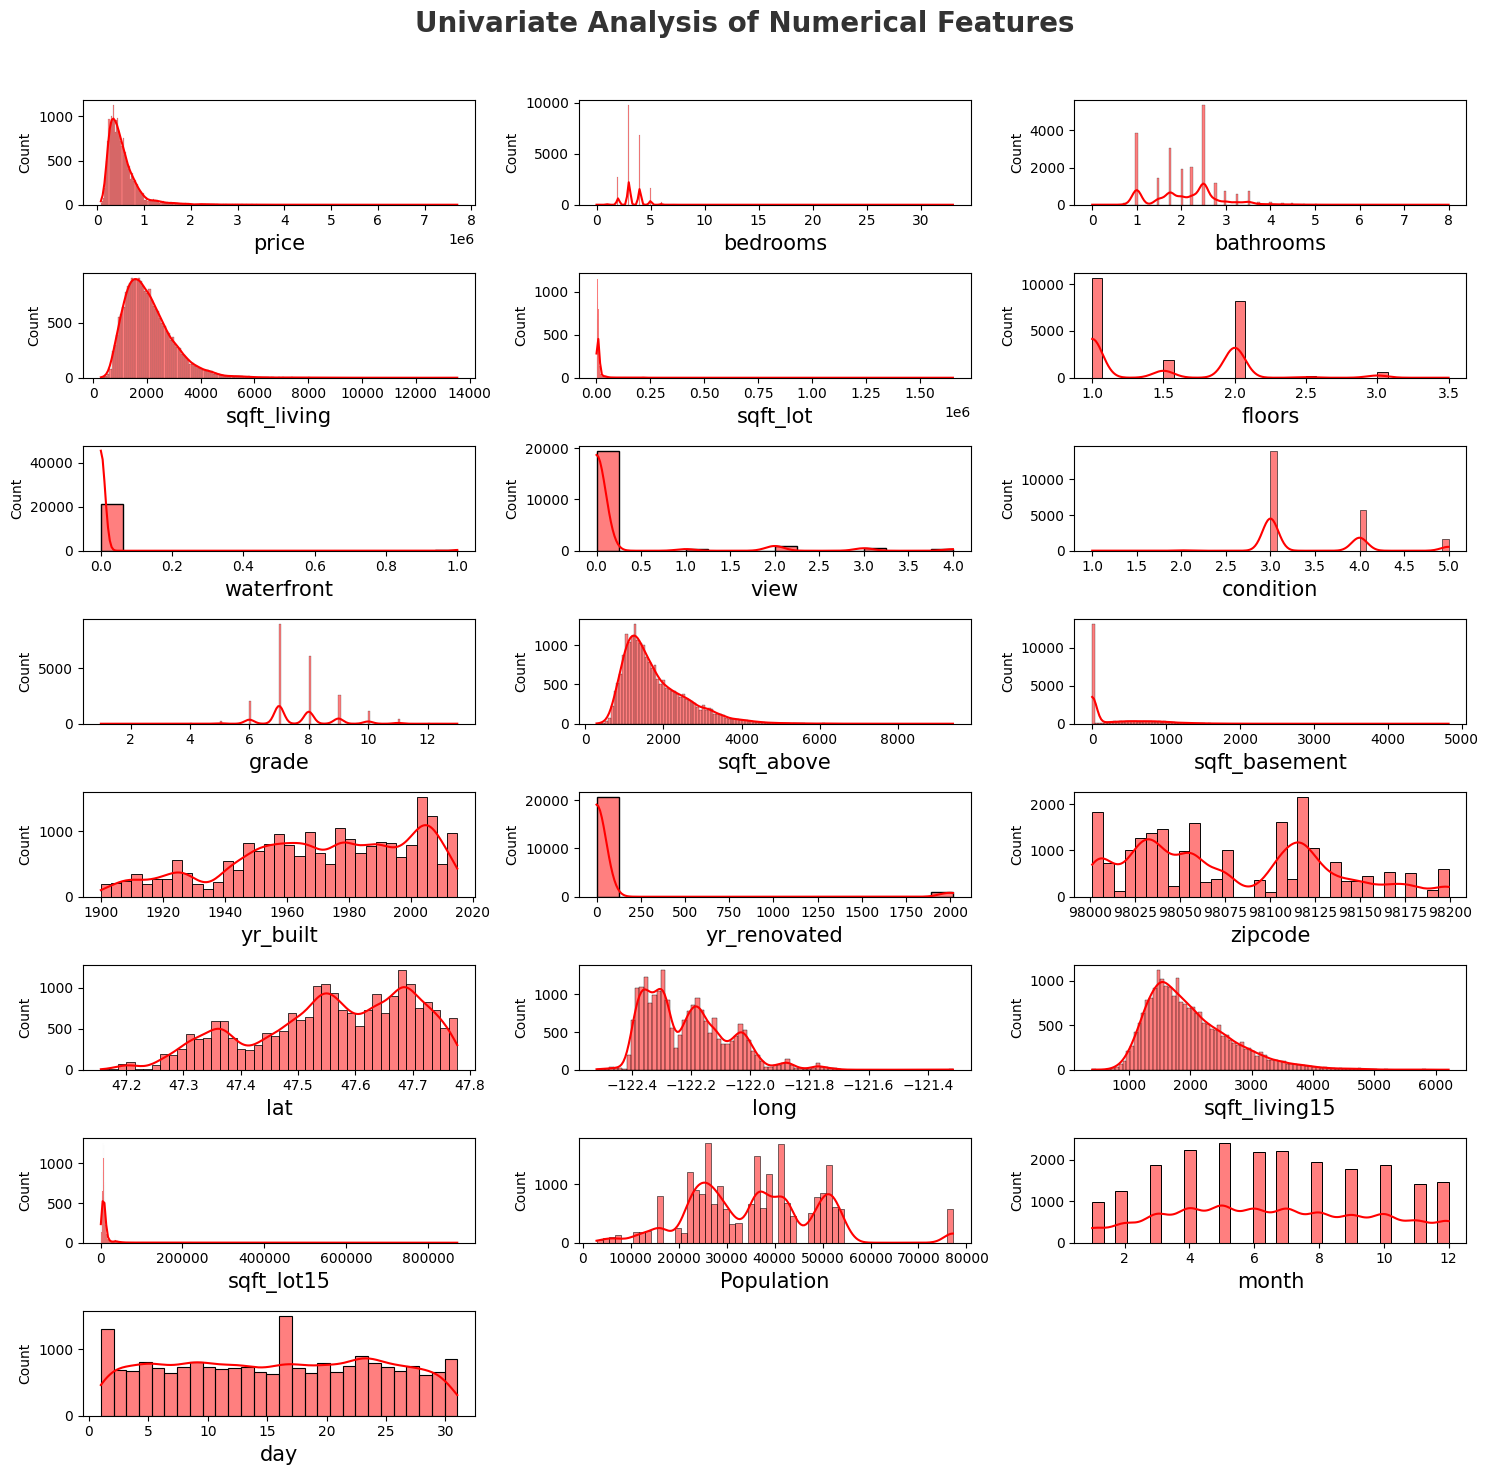

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8)

# Determine the number of rows and columns for the subplots
num_plots = len(df.select_dtypes(include=['number']).columns)  # Select numeric columns
rows = (num_plots // 3) + (num_plots % 3 > 0)

for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(rows, 3, i)  # Adjust layout to fit all columns in a grid of 3 per row
    sns.histplot(df[col], kde=True, color='r')
    plt.xlabel(col, fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()


## Features Price analysis

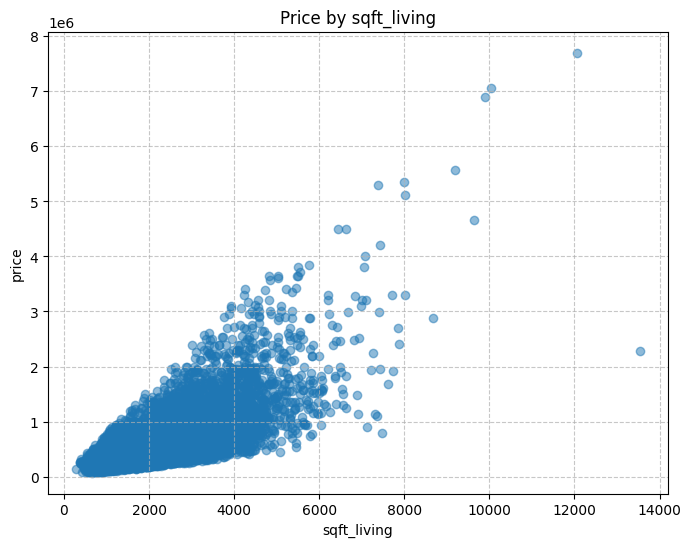

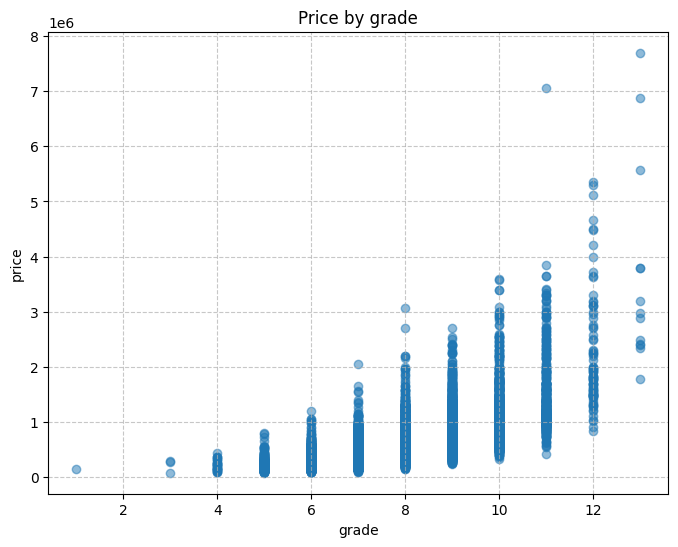

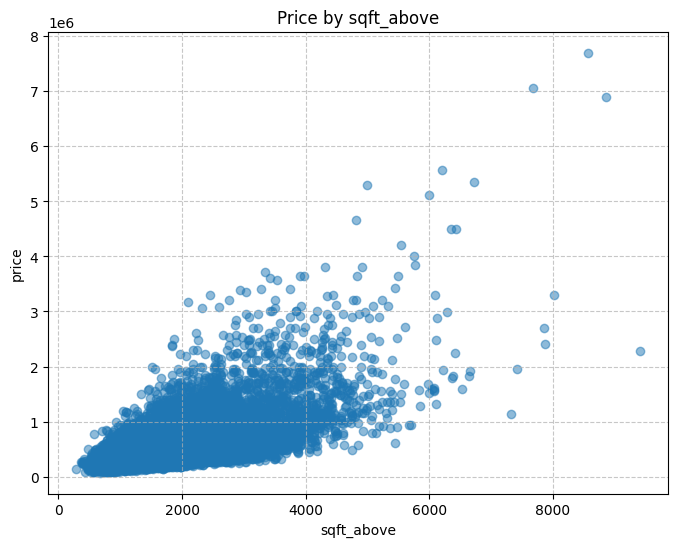

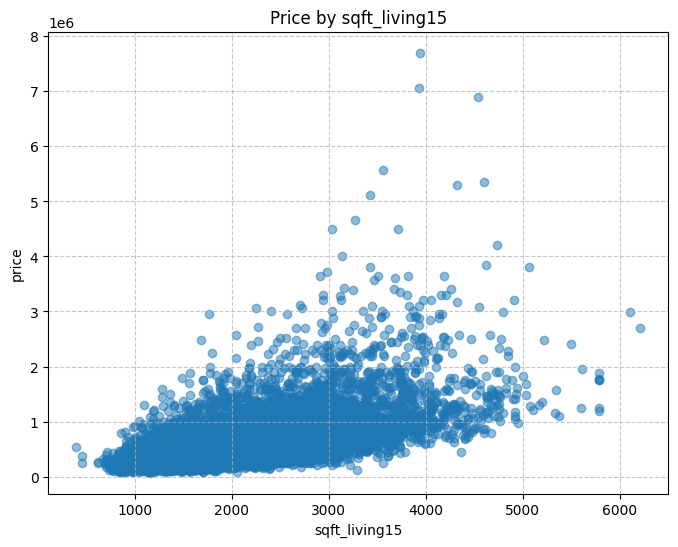

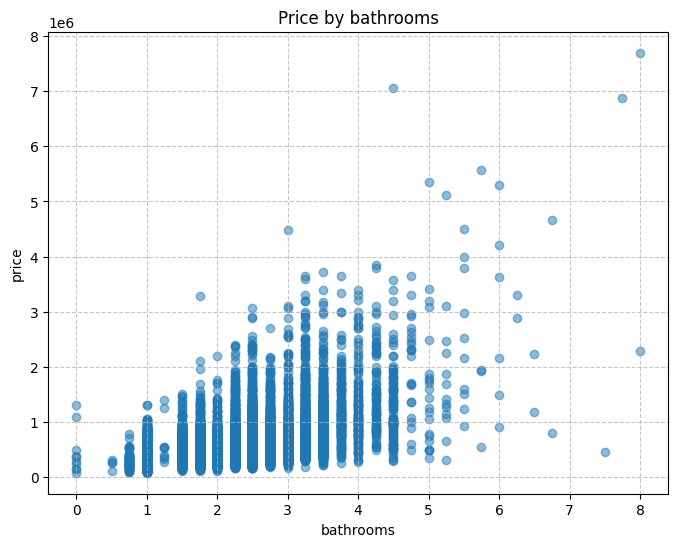

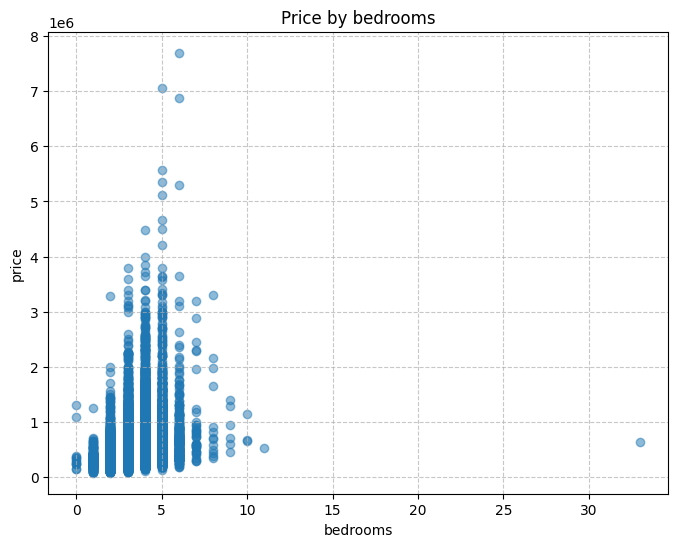

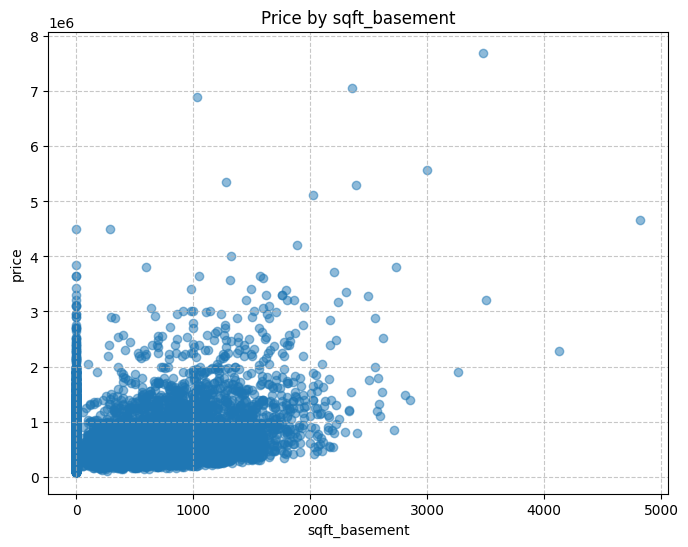

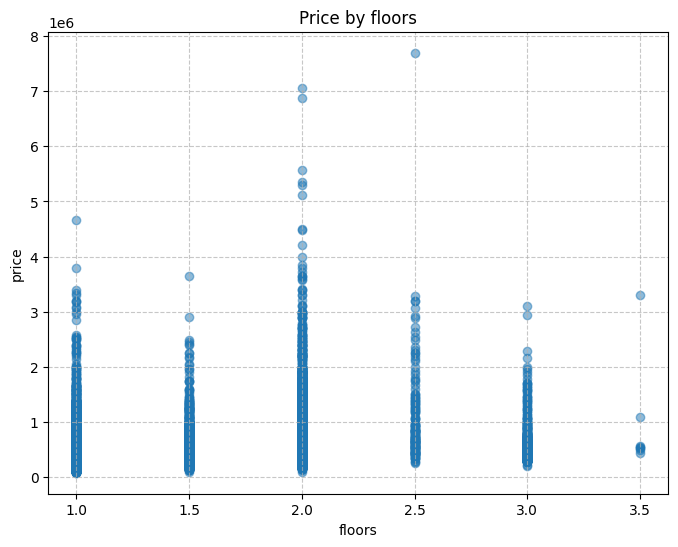

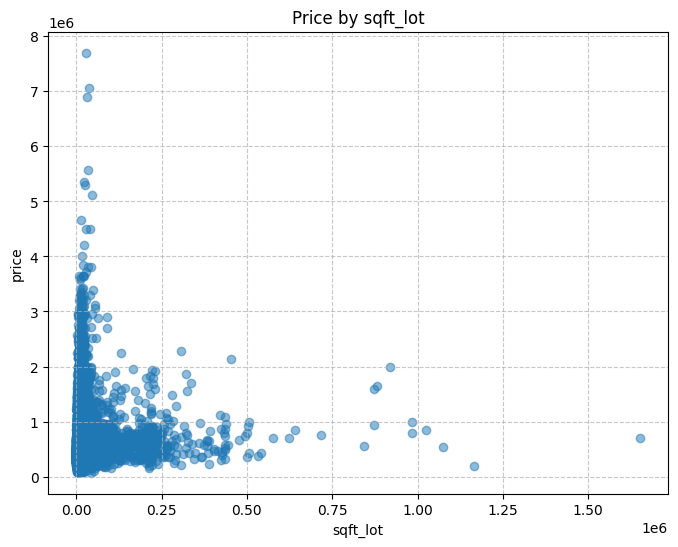

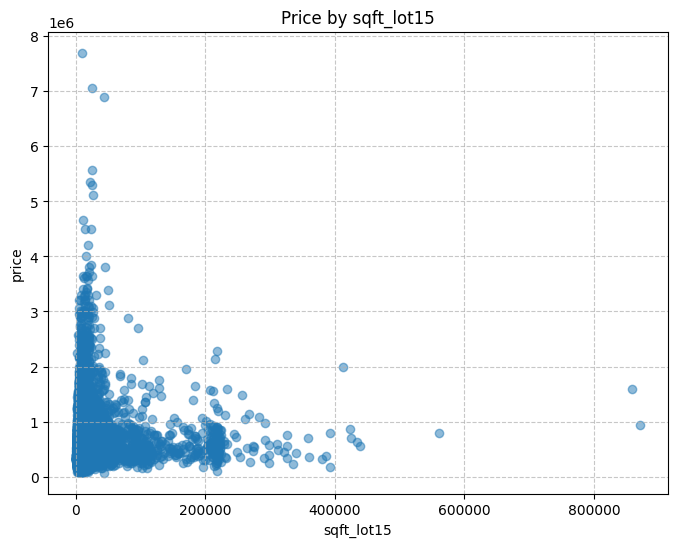

In [ ]:
# import plotly.express as px

def plot_numeric_features(df, target='price'):

  interiors = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'sqft_basement', \
               'floors', 'sqft_lot', 'sqft_lot15']
  interiors = [col for col in interiors if col != target]


  for interior in interiors:
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[interior], df[target], alpha=0.5)
    plt.title(f'Price by {interior}')
    plt.xlabel(interior)
    plt.ylabel(target)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
  # for interior in interiors:
    # fig = px.scatter(df, x=interior, y='price', title=f'Price by {interior}')
    # fig.update_layout(
    #   xaxis_title=f'{interior}',
    #   yaxis_title='Price'
    #   )
    # fig.show()

plot_numeric_features(df)


## Create new feature house_age

In [ ]:
# Calculate the age of the house
df['house_age'] = df['date'].dt.year - df['yr_built']

# For those house_age with -1 (date sold < yr_built)
df['house_age'].replace(-1, 0, inplace=True)

# Create age intervals
bins = [0, 10, 20, 30, 40, 50, int(df['house_age'].max()+1)]
cat = [1, 2, 3, 4, 5, 6]

df['house_age_cat'] = pd.cut(df['house_age'], bins=bins, labels=cat, right=False, include_lowest=True)

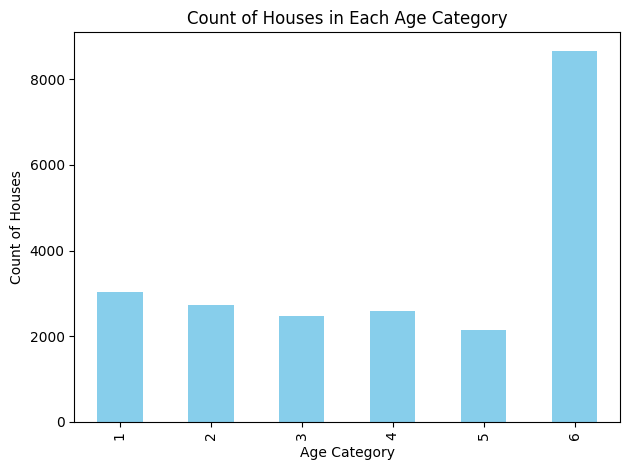

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']

# Bar plot houses in each age cat
plt.figure()
df['house_age_cat'].value_counts(sort=False).plot(kind='bar', color='skyblue')
plt.title('Count of Houses in Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count of Houses')
plt.tight_layout()
plt.show()

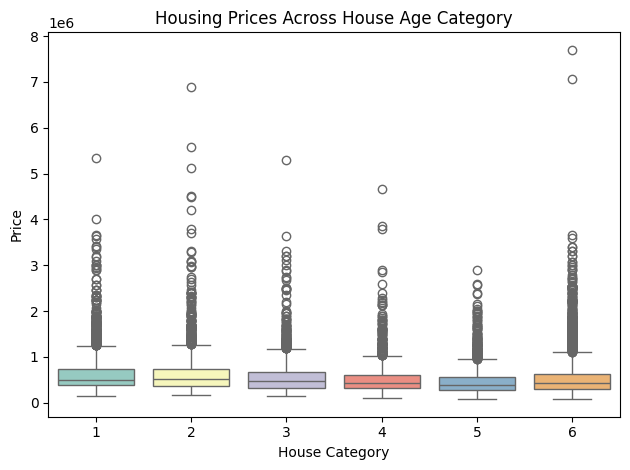

In [ ]:
# Box plot of housing prices across age groups
plt.figure()
sns.boxplot(x='house_age_cat', y='price', data=df, palette='Set3')
plt.title('Housing Prices Across House Age Category')
plt.xlabel('House Category')
plt.ylabel('Price', )
plt.tight_layout()
plt.show()

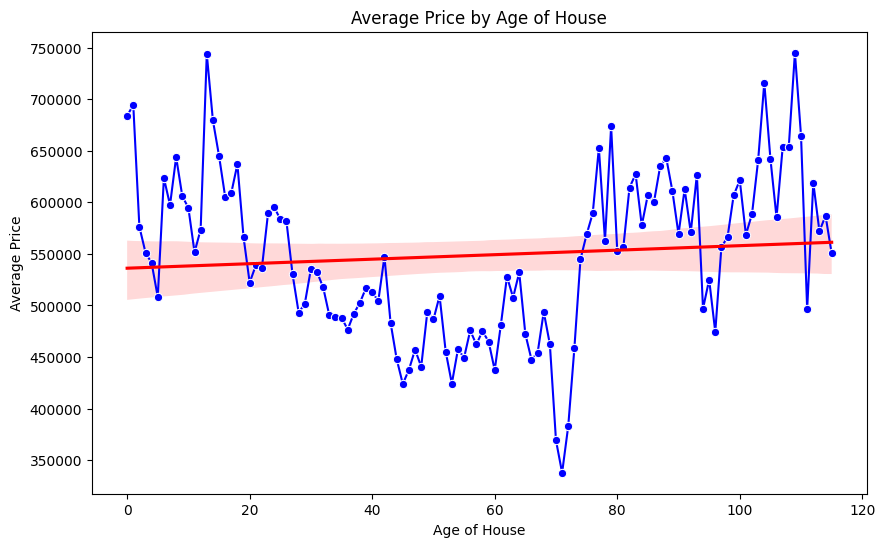

In [ ]:
age_price = df.groupby('house_age')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='house_age', y='price', data=age_price, marker='o', color='blue')
sns.regplot(x='house_age', y='price', data=age_price, marker='o', color='red',scatter=False)
plt.title('Average Price by Age of House')
plt.xlabel('Age of House')
plt.ylabel('Average Price')
plt.show()


## Geospatial Analysis

In [ ]:
import plotly.express as px

hover_cols = {
    'lat': False,
    'long': False,
    'price': True,
    'City': True,
    'address': True,
    'bedrooms': True,
    'bathrooms': True,
    'floors': True,
    'waterfront': True,
    'view': True,
    'condition': True,
    'grade': True,
    'yr_built': True,
    'yr_renovated': True,


}

# Create the scatter map
fig = px.scatter_mapbox(df, lat="lat", lon="long", color="price", size="price",
                        hover_name=None,
                        hover_data=hover_cols,
                        color_continuous_scale="Viridis", zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    margin={"r":10, "t":10, "l":10, "b":10},
    coloraxis_colorbar=dict(title="Price ($)")
)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from plotnine import ggplot, aes, geom_point, labs

def colormap_plot(df, x, y, color=None, size=None):
    plot = (ggplot(df)
            + aes(x=x, y=y, color=color, size=size)
            + geom_point()
            + labs(title=f'Colormap of {color.capitalize()}', x='Longitude', y='Latitude')
           )
    return plot

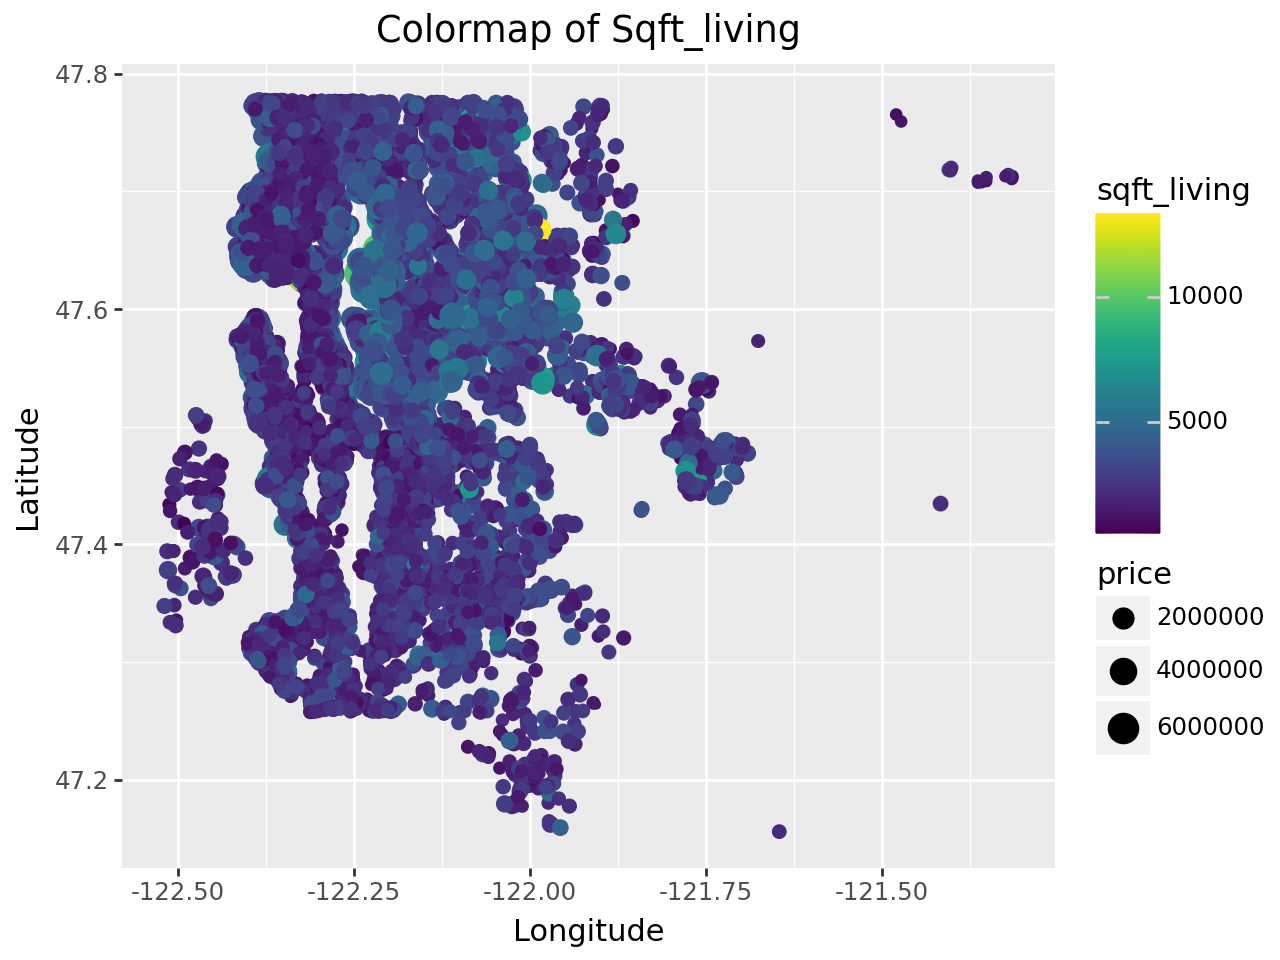

In [ ]:
colormap_plot(df, x='long', y='lat', color='sqft_living', size='price')

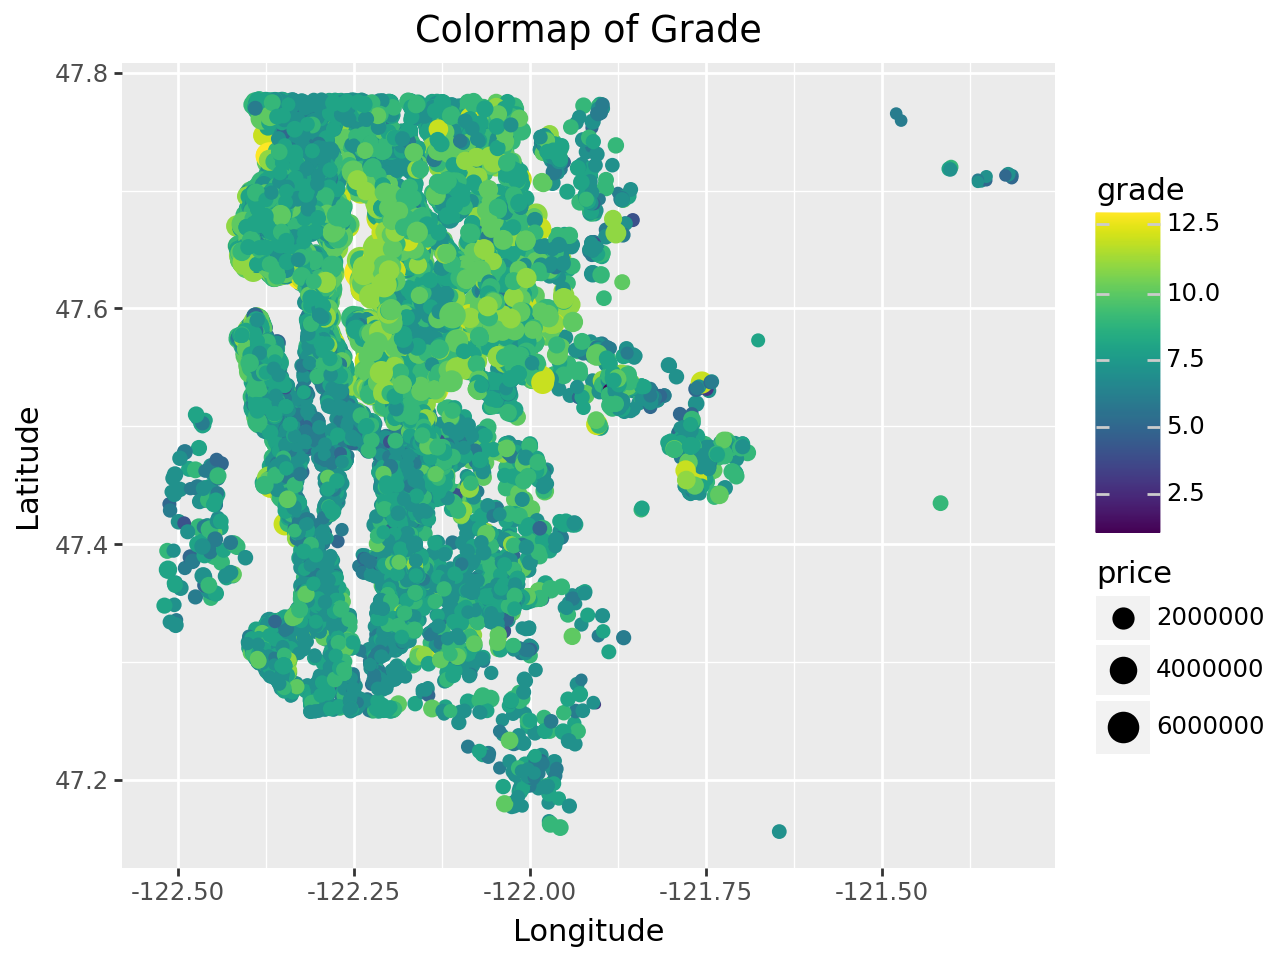

In [ ]:
colormap_plot(df, x='long', y='lat', color='grade', size='price')

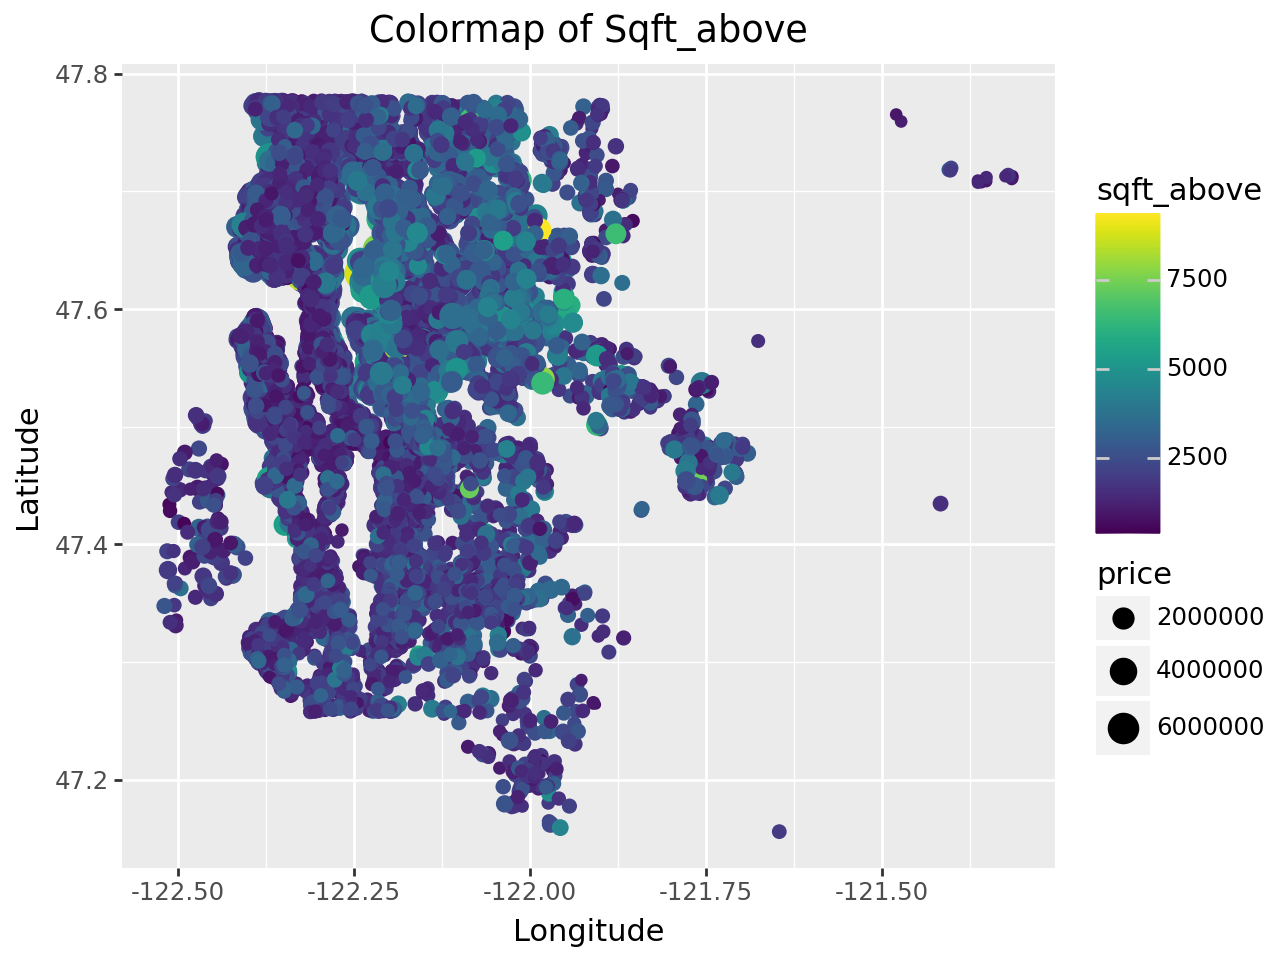

In [ ]:
colormap_plot(df, x='long', y='lat', color='sqft_above', size='price')

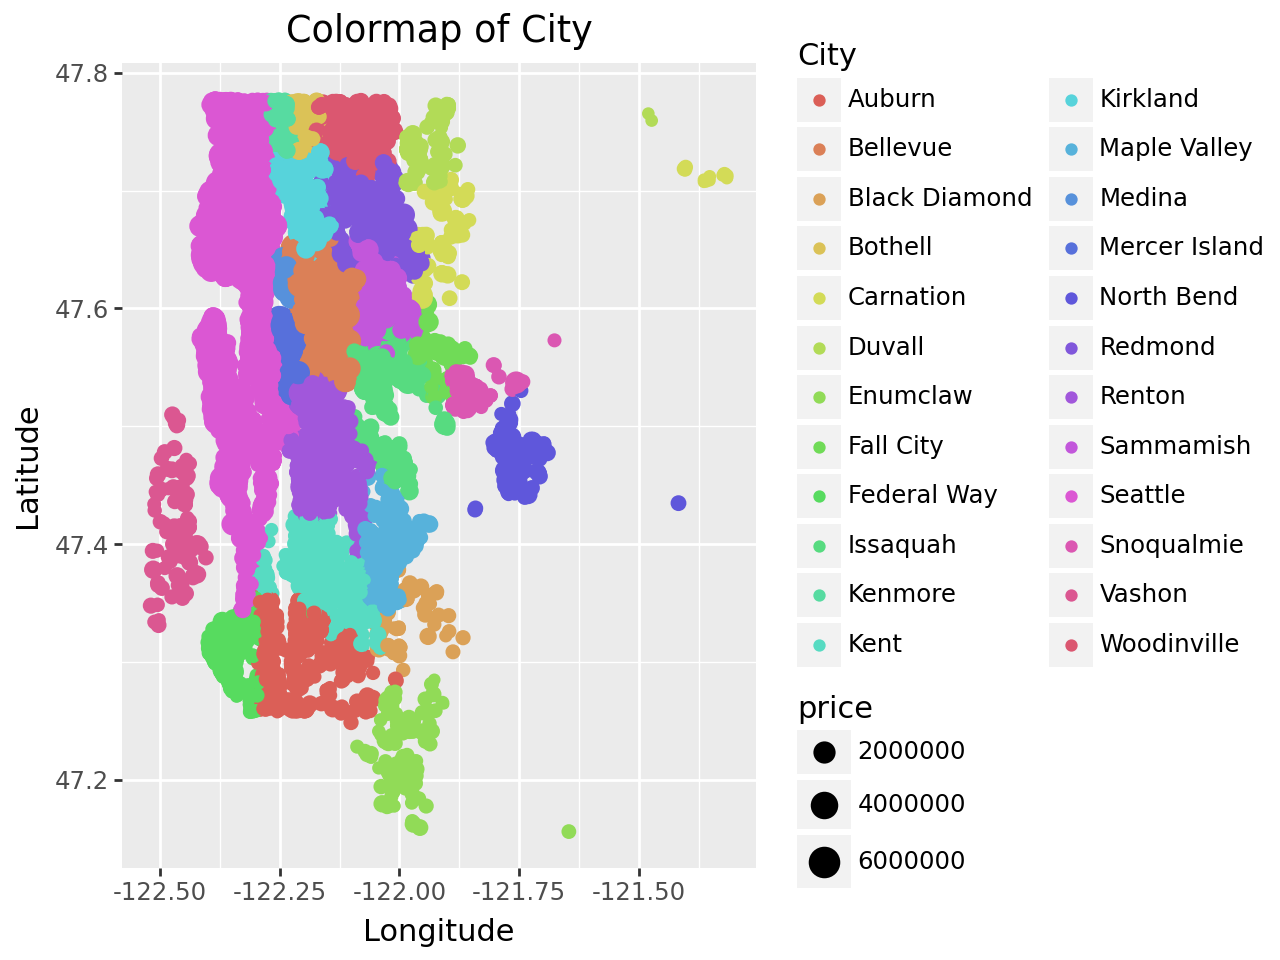

In [ ]:
colormap_plot(df, x='long', y='lat', color='City', size='price')

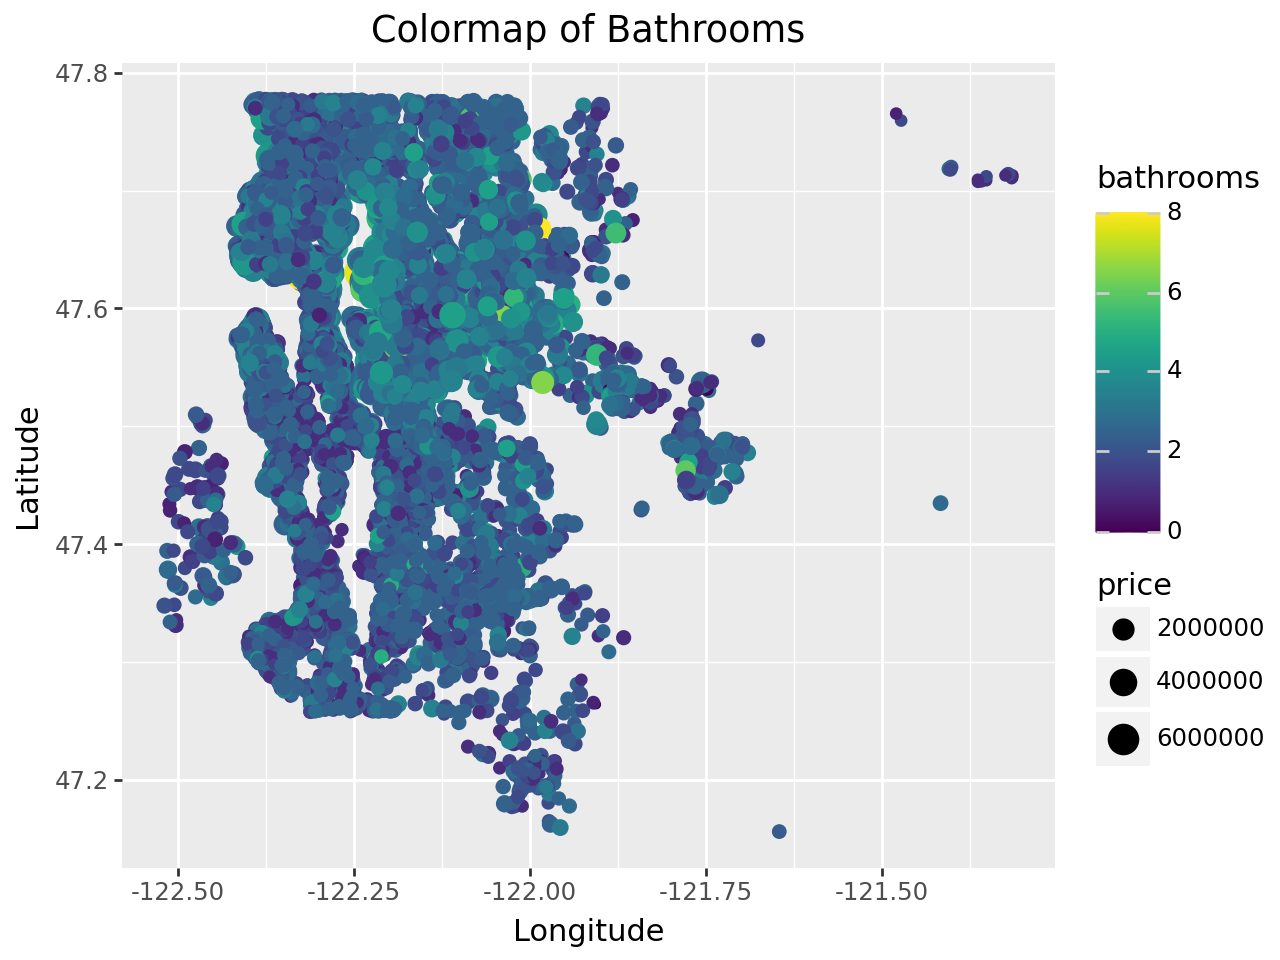

In [ ]:
colormap_plot(df, x='long', y='lat', color='bathrooms', size='price')

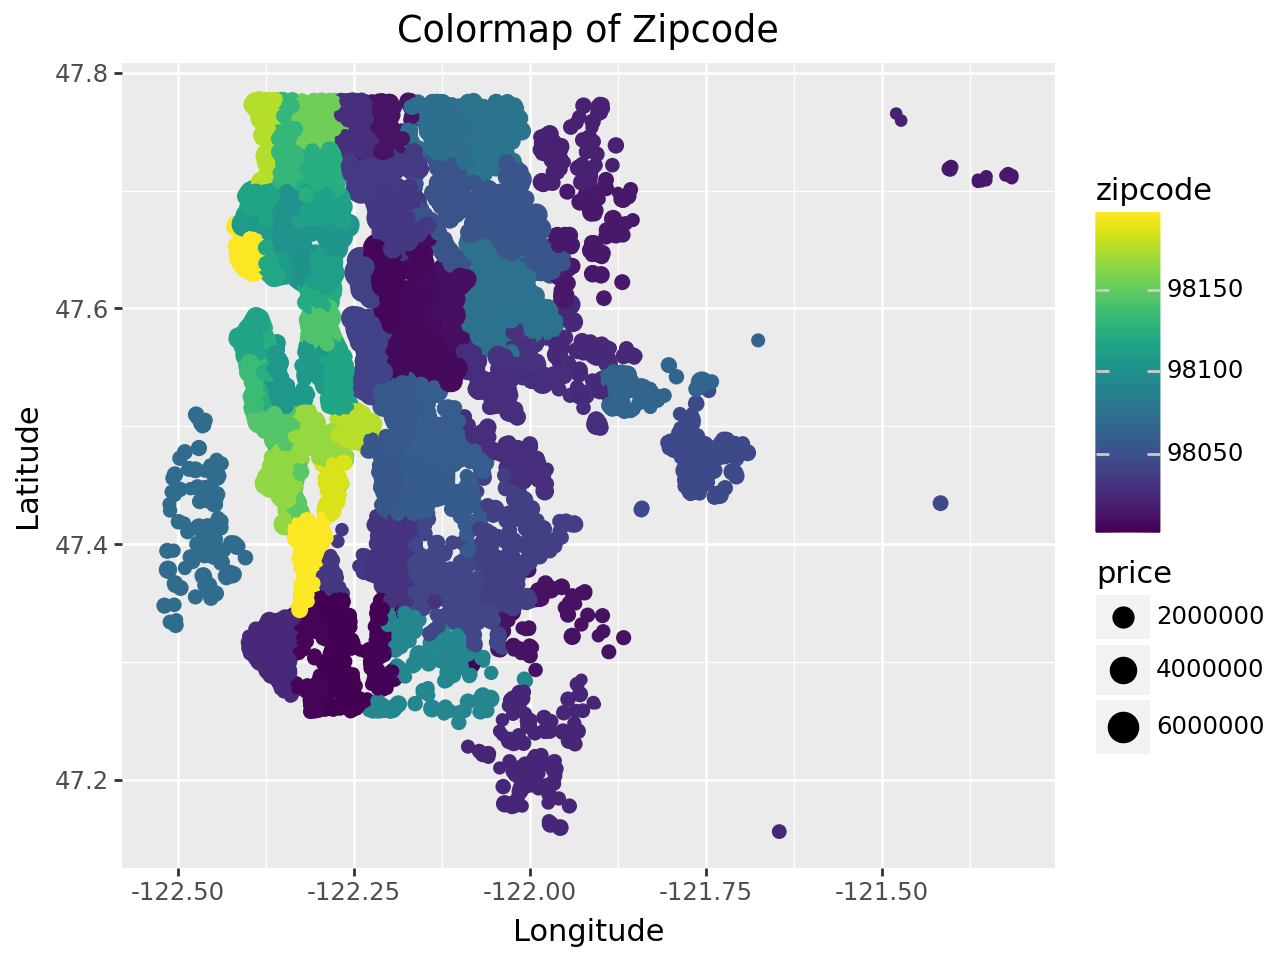

In [ ]:
colormap_plot(df, x='long', y='lat', color='zipcode', size='price')

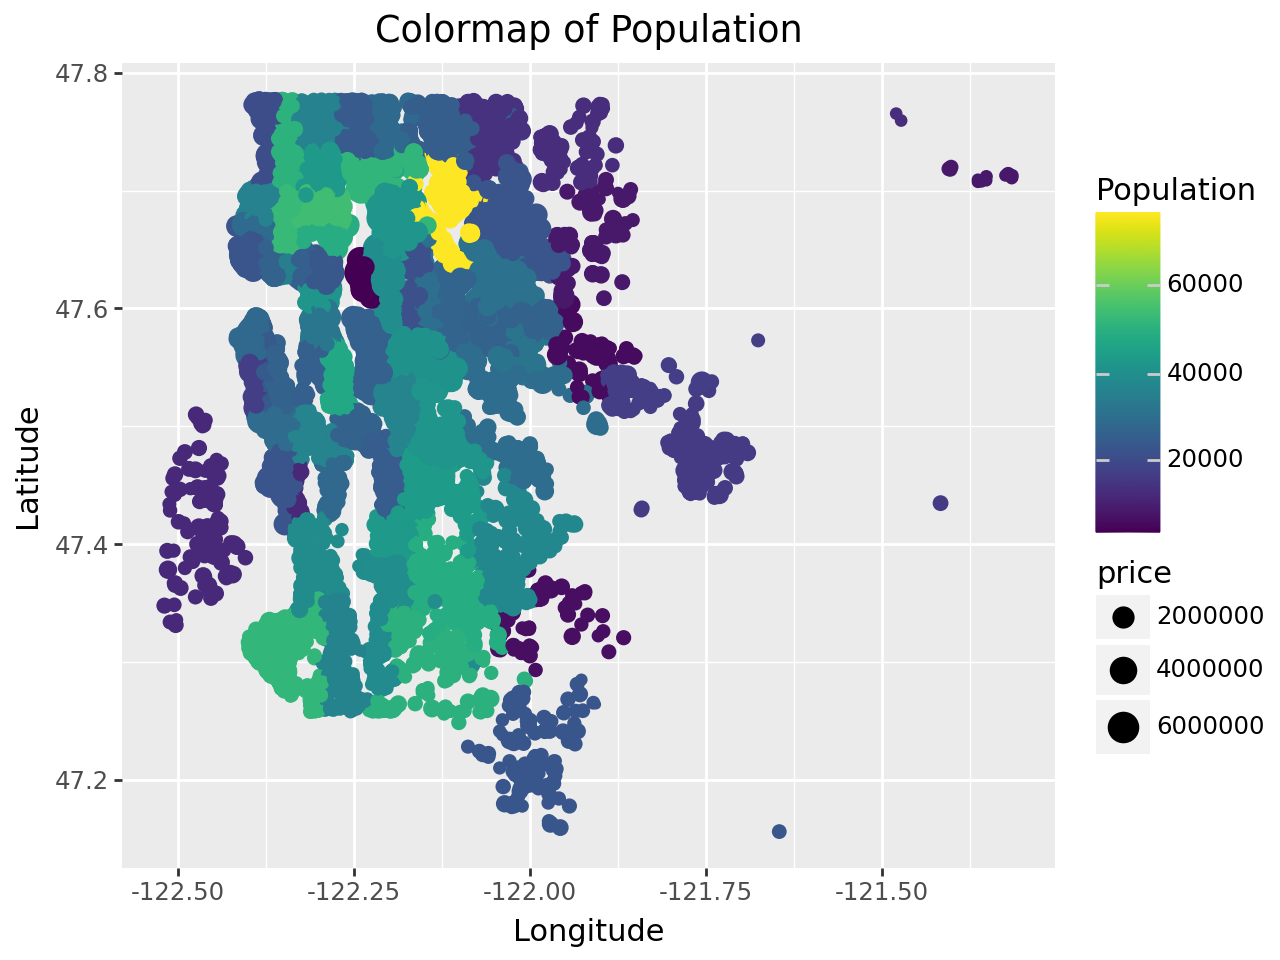

In [ ]:
colormap_plot(df, x='long', y='lat', color='Population', size='price')

## City level analysis

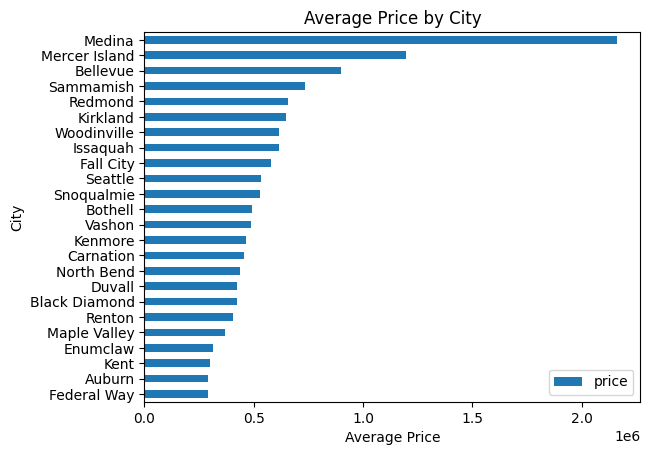

In [ ]:
df.groupby('City').agg({'price':'mean'}).sort_values(by='price').plot(kind='barh')
plt.title('Average Price by City')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.show();

In [ ]:
import plotly.express as px

city_order = df.groupby(['City'])['price'].mean().sort_values().index

fig = px.box(df, x='City',
             y='price',
             color='City',
             title='Price Distribution by City',
             category_orders={'City': city_order}
             )

fig.update_layout(
    xaxis_title='City',
    yaxis_title='Price',
    hovermode='x',
    xaxis_tickangle=-45,
    showlegend=False,
    )

fig.show()


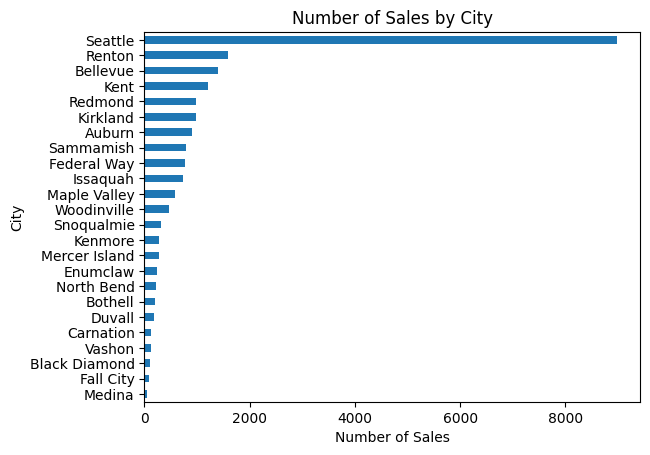

In [ ]:
df.groupby('City').size().sort_values().plot(kind='barh')
plt.title('Number of Sales by City')
plt.xlabel('Number of Sales')
plt.ylabel('City')
plt.show()

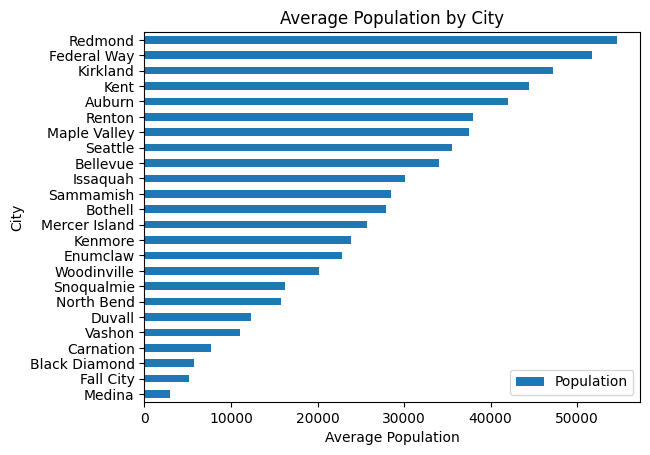

In [ ]:
df.groupby('City').agg({'Population':'mean'}).sort_values(by='Population').plot(kind='barh')
plt.title('Average Population by City')
plt.xlabel('Average Population')
plt.ylabel('City')
plt.show();

## Zipcode level analysis

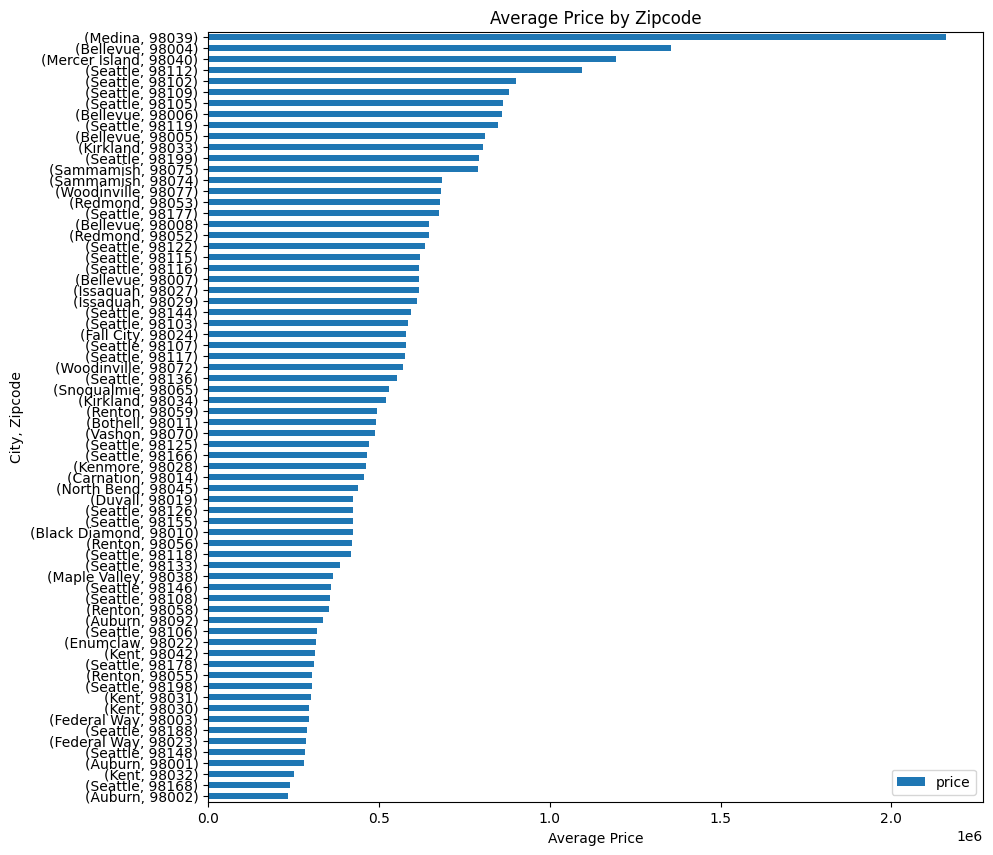

In [ ]:
df.groupby(['City','zipcode']).agg({'price':'mean'}).sort_values(by='price').plot(kind='barh', figsize=(10,10))
plt.title('Average Price by Zipcode')
plt.xlabel('Average Price')
plt.ylabel('City, Zipcode')
plt.show();

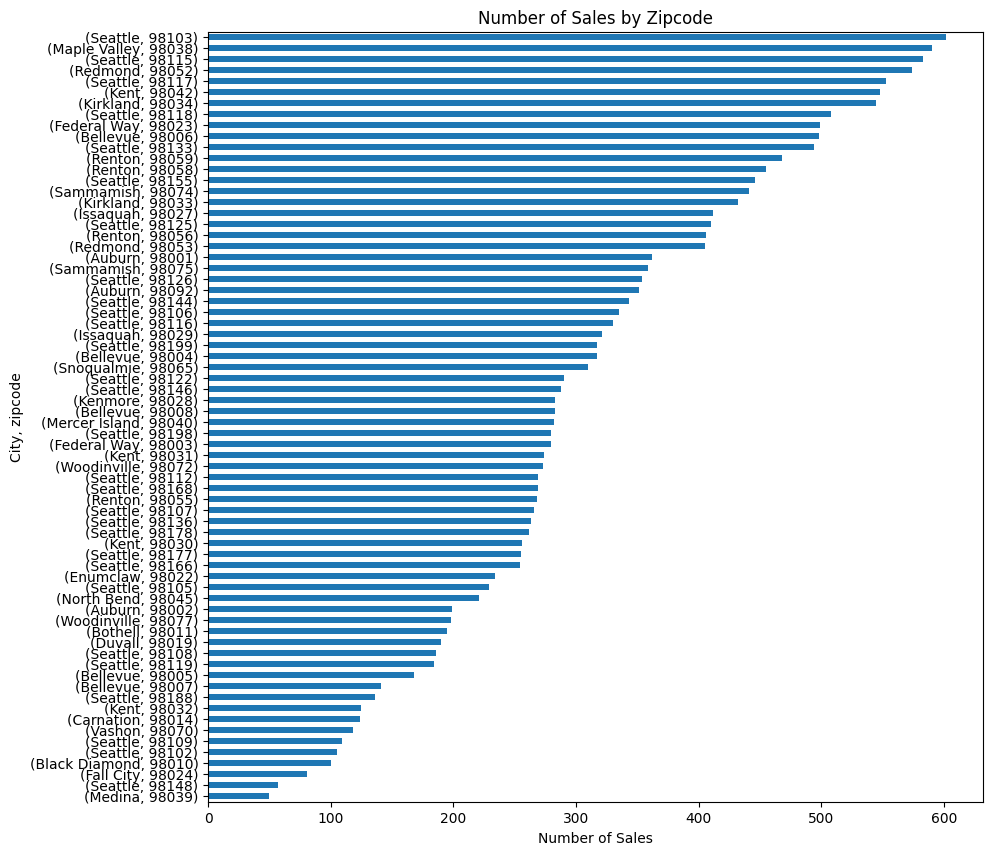

In [ ]:
df.groupby(['City','zipcode']).size().sort_values().plot(kind='barh', figsize=(10,10))
plt.title('Number of Sales by Zipcode')
plt.xlabel('Number of Sales')
plt.ylabel('City, zipcode')
plt.show()

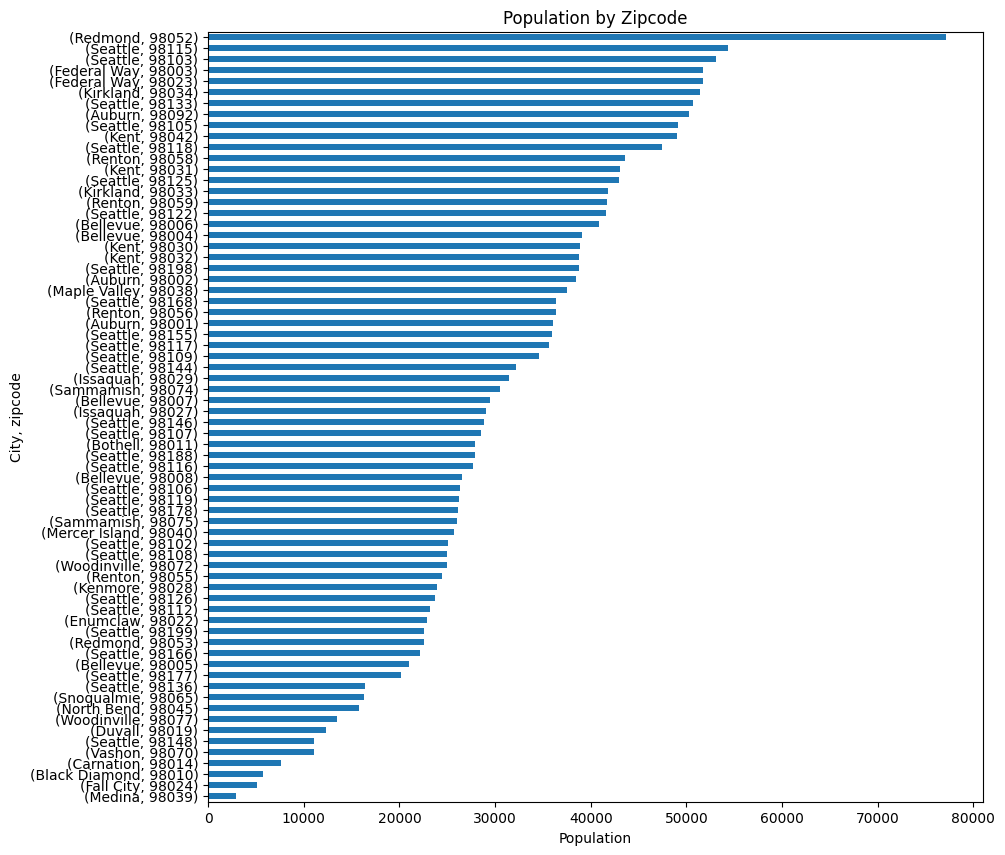

In [ ]:
df.groupby(['City','zipcode'])['Population'].mean().sort_values().plot(kind='barh', figsize=(10,10))
plt.title('Population by Zipcode')
plt.xlabel('Population')
plt.ylabel('City, zipcode')
plt.show();

## Create new feature city_avg_price

In [ ]:
city_avg_price = df.groupby('City')['price'].mean()
df['city_avg_price'] = df['City'].map(city_avg_price)

## Create new feature city_avg_pop

In [ ]:
city_avg_pop = df.groupby('City')['Population'].mean()
df['city_avg_pop'] = df['City'].map(city_avg_pop)

## Create new feature zipcode_avg_price

In [ ]:
zipcode_avg_price = df.groupby('zipcode')['price'].mean()
df['zipcode_avg_price'] = df['zipcode'].map(zipcode_avg_price)

## Correlation

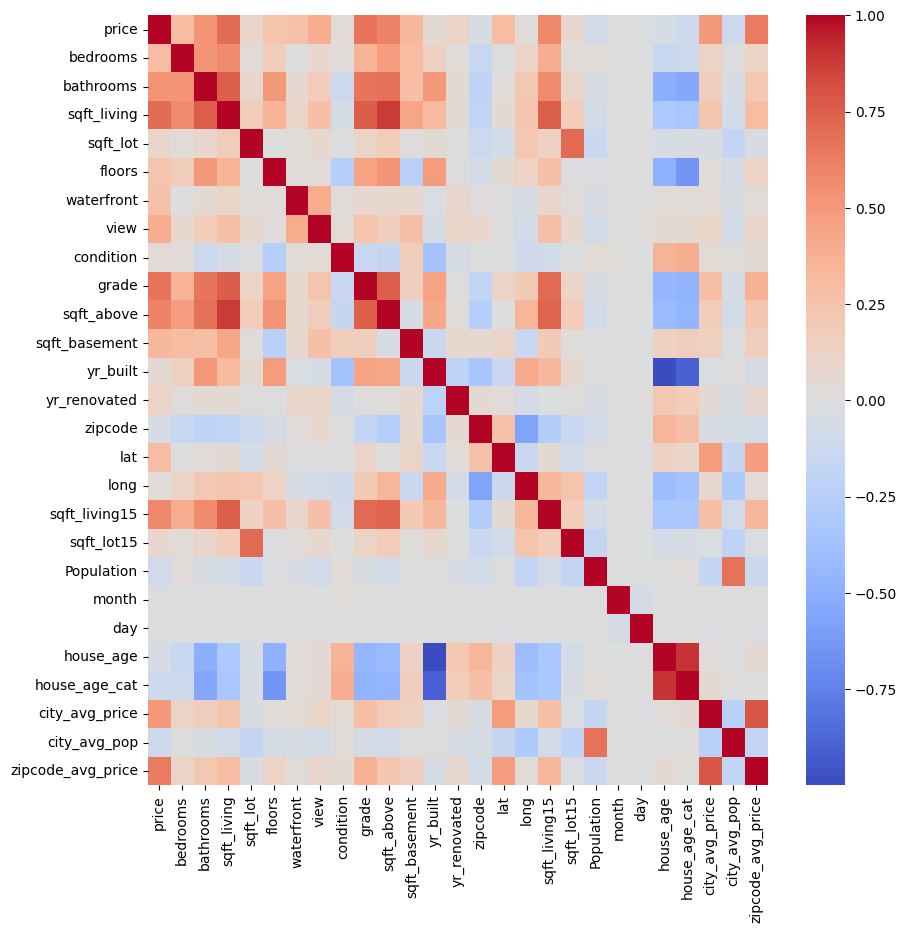

In [ ]:
temp = df.copy()
temp.drop(columns=['City','address','date'], inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(temp.corr(), cmap='coolwarm')
plt.show();

# Predictive Moldeing

## Features, target, train, test split

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

feat_oe = ['City']
feat_drop = ['date', 'address']
target = ['price']

oe = OrdinalEncoder()
df[feat_oe] = oe.fit_transform(df[feat_oe])

df['house_age_cat'] = df['house_age_cat'].astype(int)

X = df.drop(columns=feat_drop+target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Features ranking

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.feature_selection import RFECV, RFE

et = ExtraTreesRegressor(random_state=42)
et.fit(X_train, y_train)

et_importances = et.feature_importances_

rfr = RandomForestRegressor(n_estimators=100, random_state=43)
# rfecv = RFECV(estimator=rfr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# rfecv.fit(X_train, y_train)
rfe = RFE(estimator=rfr, n_features_to_select=10)
rfe.fit(X_train, y_train)

results_df = pd.DataFrame({
    'Feature': X_train.columns,
    'ExtraTreesRegressor (%)': np.round(et_importances * 100, 2),
    # 'RFE Ranking CV': rfecv.ranking_
    'RFE Ranking': rfe.ranking_
}).sort_values(by='ExtraTreesRegressor (%)', ascending=False)

results_df

Feature  ExtraTreesRegressor (%)  RFE Ranking
8               grade                    21.19            1
26  zipcode_avg_price                    18.29            1
2         sqft_living                    17.83            1
16      sqft_living15                     6.19            1
14                lat                     5.04            1
9          sqft_above                     5.03            1
6                view                     3.93            1
5          waterfront                     3.48            1
1           bathrooms                     2.93            8
15               long                     2.59            1
24     city_avg_price                     2.06            6
11           yr_built                     1.20            4
22          house_age                     1.19            1
10      sqft_basement                     0.95           10
3            sqft_lot                     0.88            2
23      house_age_cat                     0.88           17
13            zipcode                     0.85            9
17         sqft_lot15                     0.73            3
7           condition                     0.67           12
20              month                     0.61            7
19         Population                     0.56           11
21                day                     0.55            5
0            bedrooms                     0.55           13
12       yr_renovated                     0.51           16
4              floors                     0.49           15
25       city_avg_pop                     0.47           14
18               City                     0.32           18

## Base Model Comparison

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split, KFold, cross_val_score

# # Define categorical and numeric features
# categorical_columns = ['City']
# numeric_columns = [col for col in df.columns if col not in ['date', 'address', 'price', 'City']]

# # Define ColumnTransformer for preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_columns),           # Scale numeric features
#         ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-hot encode categorical features
#     ]
# )

# # Define regression models in a dictionary
# models = {
#     'ScaledLR': Pipeline([('preprocessor', preprocessor), ('LR', LinearRegression())]),
#     'ScaledRidge': Pipeline([('preprocessor', preprocessor), ('Ridge', Ridge())]),
#     'ScaledLasso': Pipeline([('preprocessor', preprocessor), ('Lasso', Lasso())]),
#     'ScaledEN': Pipeline([('preprocessor', preprocessor), ('EN', ElasticNet())]),
#     'Scaledk-NN': Pipeline([('preprocessor', preprocessor), ('k-NN', KNeighborsRegressor())]),
#     'DT': Pipeline([('preprocessor', preprocessor), ('DT', DecisionTreeRegressor())]),
#     'RFR': Pipeline([('preprocessor', preprocessor), ('RFR', RandomForestRegressor())]),
#     'GBR': Pipeline([('preprocessor', preprocessor), ('GBR', GradientBoostingRegressor())]),
#     'Ada': Pipeline([('preprocessor', preprocessor), ('Ada', AdaBoostRegressor())])
# }

# # Split data into train and test sets
# X = df.drop(columns=['price', 'date', 'address'])
# y = df['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# # Evaluate each model using cross-validation
# for name, model in models.items():
#     kfold = KFold(n_splits=10, shuffle=True, random_state=101)
#     r2_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
#     print(f'{name}: Mean R^2 = {r2_scores.mean():.3f}')


ScaledLR: MSE = 28179426016.797, RMSE = 167867.287, R2 = 0.791
ScaledRidge: MSE = 28210683987.217, RMSE = 167960.364, R2 = 0.790
ScaledLasso: MSE = 28270271038.882, RMSE = 168137.655, R2 = 0.790
ScaledEN: MSE = 32702235658.552, RMSE = 180837.595, R2 = 0.757
Scaledk-NN: MSE = 25096115872.313, RMSE = 158417.537, R2 = 0.814
DT: MSE = 33068123334.110, RMSE = 181846.428, R2 = 0.751
RFR: MSE = 15950497700.503, RMSE = 126295.280, R2 = 0.883
GBR: MSE = 16368571377.451, RMSE = 127939.718, R2 = 0.878
Ada: MSE = 92943706134.457, RMSE = 304866.702, R2 = 0.287


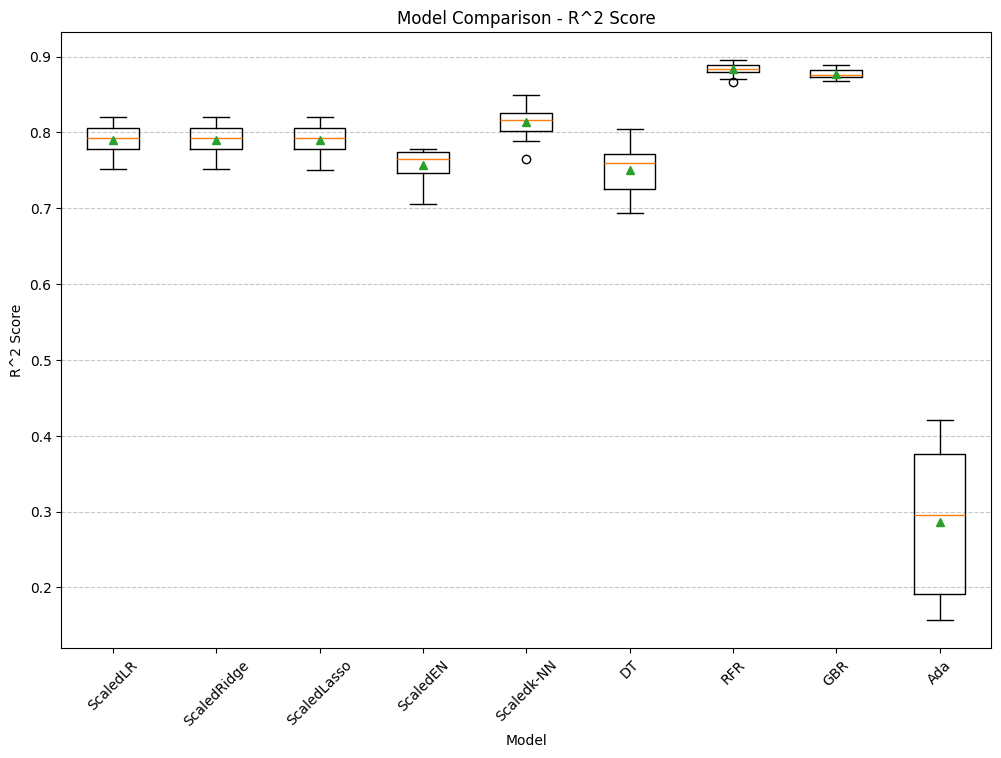

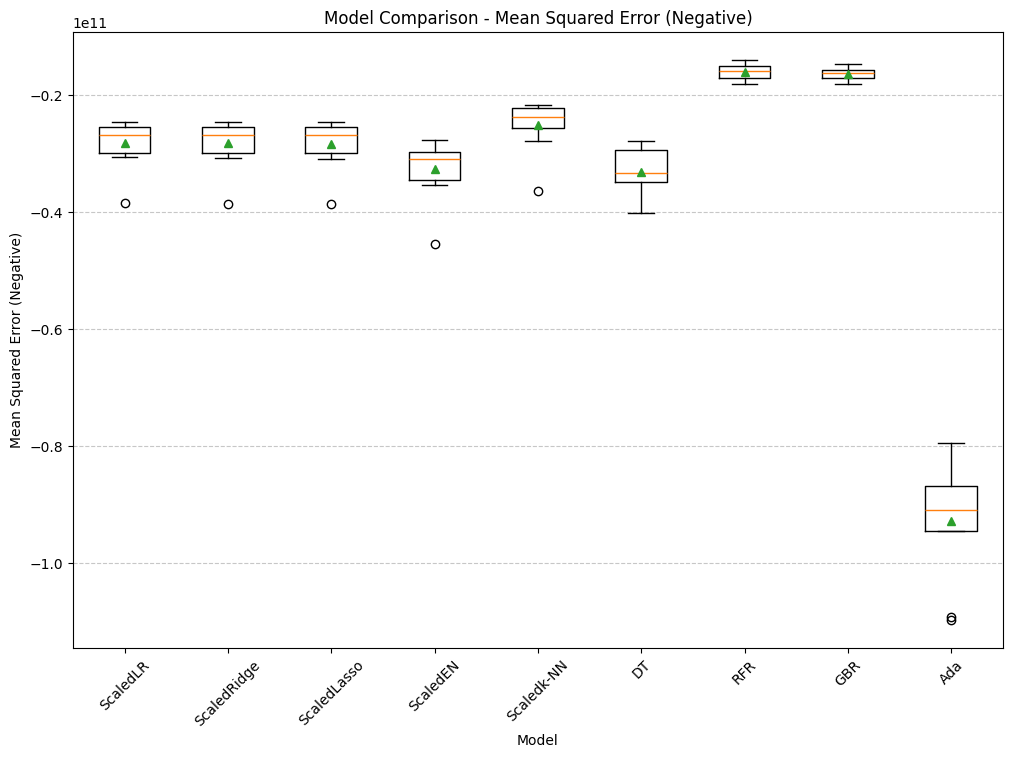

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Define regression models in a dictionary
models = {
    'ScaledLR': Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())]),
    'ScaledRidge': Pipeline([('scaler', StandardScaler()), ('Ridge', Ridge())]),
    'ScaledLasso': Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso())]),
    'ScaledEN': Pipeline([('scaler', StandardScaler()), ('EN', ElasticNet())]),
    'Scaledk-NN': Pipeline([('scaler', StandardScaler()), ('k-NN', KNeighborsRegressor())]),
    # 'ScaledSVM': Pipeline([('scaler', StandardScaler()), ('SVM', SVR())]),
    'DT': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(),
    'GBR': GradientBoostingRegressor(),
    'Ada': AdaBoostRegressor()
}

# Evaluate each model
r2_scores_list = []
mse_scores_list = []
model_names = []

for name, model in models.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=101)
    # Perform cross-validation once to calculate both MSE and R2
    mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

    mse_mean = abs(mse_scores.mean())  # Convert negative MSE to positive
    rmse_mean = np.sqrt(mse_mean)     # RMSE is the square root of MSE
    r2_mean = r2_scores.mean()        # Mean R2 score

    # Append scores to lists for visualization
    mse_scores_list.append(mse_scores)
    r2_scores_list.append(r2_scores)
    model_names.append(name)

    # Print results
    print(f'{name}: MSE = {mse_mean:.3f}, RMSE = {rmse_mean:.3f}, R2 = {r2_mean:.3f}')

# Boxplot of R^2 results
plt.figure(figsize=(12, 8))
plt.boxplot(r2_scores_list, labels=model_names, showmeans=True)
plt.title('Model Comparison - R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot of MSE results
plt.figure(figsize=(12, 8))
plt.boxplot(mse_scores_list, labels=model_names, showmeans=True)
plt.title('Model Comparison - Mean Squared Error (Negative)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (Negative)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## RFR Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, random_state=42, n_jobs=1, verbose=1, scoring='neg_mean_squared_error'
                                   )
random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:\n", random_search.best_score_)


best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"Average Sales: {y.mean()}")

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

# print(f"MSE: {mean_squared_error(y_test, y_pred)}")
# print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
# print(f"R2: {r2_score(y_test, y_pred)}")
# print(f"Average Sales: {y.mean()}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best Cross-Validation Accuracy:
 0.8813927498373142
MSE: 15322736292.549925
RMSE: 123785.04066546138
R2: 0.887689131592545
Average Sales: price    540088.141767
dtype: float64
